In [149]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [150]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosperLoanData.csv')

In [151]:
pd.set_option('display.max_columns', None)

In [152]:
# high-level overview of data shape and composition
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [153]:
df.shape

(113937, 81)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [155]:
# descriptive statistics for numeric variables
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [156]:
df['LoanOriginationDate'].unique()

array(['2007-09-12 00:00:00', '2014-03-03 00:00:00',
       '2007-01-17 00:00:00', ..., '2009-07-23 00:00:00',
       '2008-10-17 00:00:00', '2005-11-15 00:00:00'], dtype=object)

1> ListingCreationDate, ClosedDate, DateCreditPulled, LoanOriginationDate columns are of Object datatype. These columns should be converted to datetime datatype instead of object datatype.

2> Lot of columns have missing values.

3> ListingNumber, LoanNumber should be Object datatype instead of int.

4> Duplicate Listing Numbers. Dropping duplicates - Keeping ones with max Prosper score.

5> Column names have capital letters. Change to all small.

In [157]:
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'], format='%Y-%m-%d %H:%M:%S.%f')

In [158]:
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'], format='%Y-%m-%d %H:%M:%S')

In [159]:
df['DateCreditPulled'] = pd.to_datetime(df['DateCreditPulled'], format='%Y-%m-%d %H:%M:%S.%f')

In [160]:
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'], format='%Y-%m-%d %H:%M:%S')

In [161]:
df['ListingNumber'] = df['ListingNumber'].astype(str)
df['LoanNumber'] = df['LoanNumber'].astype(str)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  object        
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [163]:
pd.to_datetime(df.ListingCreationDate).min(), pd.to_datetime(df.ListingCreationDate).max()

(Timestamp('2005-11-09 20:44:28.847000'),
 Timestamp('2014-03-10 12:20:53.760000'))

In [164]:
#Dropping duplicate records for Listings
df.sort_values(by=['ListingNumber', 'ProsperScore'], inplace=True)
df.drop_duplicates(subset=['ListingNumber'],keep='last', inplace=True)

In [165]:
df.shape

(113066, 81)

In [166]:
df.ProsperScore.value_counts()

4.0     12423
6.0     12174
8.0     11988
7.0     10511
5.0      9737
3.0      7517
9.0      6884
2.0      5659
10.0     4716
11.0     1456
1.0       917
Name: ProsperScore, dtype: int64

In [167]:
df.Occupation.value_counts().index

Index(['Other', 'Professional', 'Computer Programmer', 'Executive', 'Teacher',
       'Administrative Assistant', 'Analyst', 'Sales - Commission',
       'Accountant/CPA', 'Clerical', 'Sales - Retail', 'Skilled Labor',
       'Retail Management', 'Nurse (RN)', 'Construction', 'Truck Driver',
       'Laborer', 'Police Officer/Correction Officer', 'Civil Service',
       'Engineer - Mechanical', 'Military Enlisted', 'Food Service Management',
       'Engineer - Electrical', 'Food Service', 'Medical Technician',
       'Attorney', 'Tradesman - Mechanic', 'Social Worker', 'Postal Service',
       'Professor', 'Realtor', 'Doctor', 'Nurse (LPN)', 'Nurse's Aide',
       'Tradesman - Electrician', 'Waiter/Waitress', 'Fireman', 'Scientist',
       'Military Officer', 'Bus Driver', 'Principal', 'Teacher's Aide',
       'Pharmacist', 'Student - College Graduate Student', 'Landscaping',
       'Engineer - Chemical', 'Investor', 'Architect',
       'Pilot - Private/Commercial', 'Clergy', 'Student -

In [168]:
# convert LoanStatus into ordered categorical types
#ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
#                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
#                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

ordinal_var_dict = {'LoanStatus': ['Current', 'FinalPaymentInProgress', 'Completed', 'Past Due (1-15 days)',
                                   'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)',
                                   'Past Due (91-120 days)', 'Past Due (>120 days)', 'Chargedoff', 'Defaulted',
                                   'Cancelled']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

Things to Explore:

1> Time between ListingCreationDate & LoanOriginationDate

2> Percentage of loans closed - LoanStatus

3> How much did the lenders earn - Lender Yield

4> Loans taken for what purpose - ListingCategory

5> Number of loans made in each year.

6> How many friends have invested - InvestmentFromFriendsCount

7> Loans made for different ProsperScores custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009. - ProsperScore

8> loans made by state - BorrowerState

9> Borrower information at the time of listing - Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CreditScoreRangeLower, CreditScoreRangeUpper, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, TotalProsperLoans, 

### What is the structure of your dataset?


The data consists of information on 113,937 loans from Prosper Funding LLC (the first peer-to-peer lending marketplace in the United States). This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

I performed some data wrangling in order to clean the data. Most variables are numeric in nature, but the variables

There are 53,940 diamonds in the dataset with 10 features (carat, cut, color, clarity, depth, table, price, x, y, and z). Most variables are numeric in nature, but the variables cut, color, and clarity are ordered factor variables with the following levels.

(worst) ——> (best) <br>
cut: Fair, Good, Very Good, Premium, Ideal <br>
color: J, I, H, G, F, E, D <br>
clarity: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are the best predictors of loan defaults.

I'm most interested in figuring out what features are best for predicting the price of the diamonds in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the Credit Score will be the strongest predictor of loan defaults, the lower the Credit score, higher the chance of defaults. I also think that the borrower's employment status duration, whether borrower is a homeowner and 
the ratio of monthly loan payments to the borrower's monthly salary.

I expect that carat will have the strongest effect on each diamond's price: the larger the diamond, the higher the price. I also think that the other big "C"s of diamonds: cut, color, and clarity, will have effects on the price, though to a much smaller degree than the main effect of carat.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: Loan Status

In [169]:
status_items = df['LoanStatus'].value_counts()
total = df.shape[0]

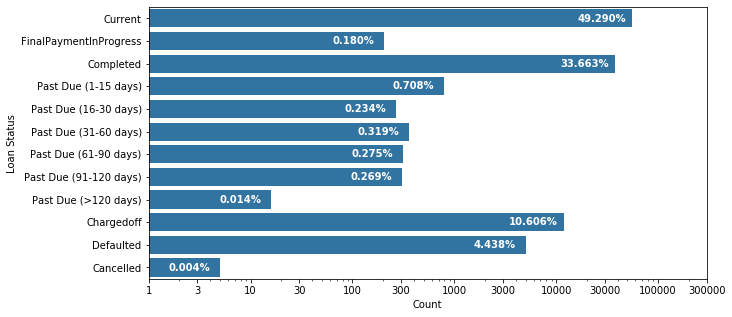

In [170]:
plt.figure(figsize=[10, 5]);
base_color = sb.color_palette()[0]
ax = sb.countplot(data = df, y = 'LoanStatus', color = base_color);
plt.xscale('log');
x_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
plt.xticks(x_ticks, x_ticks);
plt.xlabel('Count');
plt.ylabel('Loan Status');
status_counts_name = status_items.index
rects = ax.patches
texts = ['{:0.3f}%'.format(100*status_items[i]/total) for i in range(status_items.shape[0])]

for rect, text in zip(rects, texts):
    height = rect.get_height()
    width = rect.get_width()
    ax.text(width/2, rect.get_y()+rect.get_height()/2, text, color='white', fontweight='bold', ha='center', va='center')

#### Above plot shows that about 50% loans are current, about 34% are completed or close to completion, about 1.75% of the loans are past due in payment, a little over 10% have been charged off and a little over 4% of the load are defaulted.

Plot of Borrowers by State.

In [172]:
#np.sort(df['BorrowerState'].value_counts().index)
#df['BorrowerState'].isnull().sum()
df['BorrowerState'].isnull().sum()

5515

In [173]:
df.shape

(113066, 81)

In [176]:
#Dropping rows where BorrowerState is null.
df = df.drop(index=df[df['BorrowerState'].isnull()].index)

In [177]:
df.shape

(107551, 81)

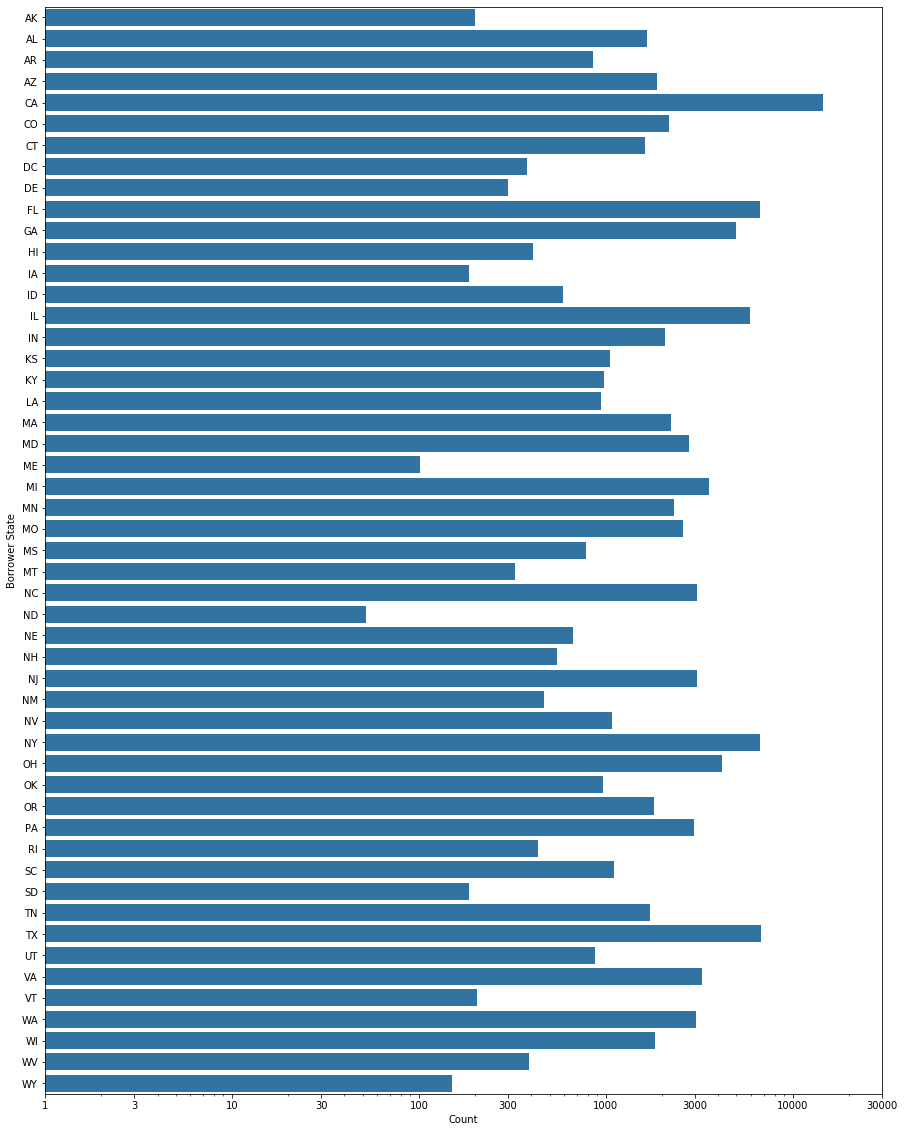

In [178]:
plt.figure(figsize=[15, 20]);
base_color = sb.color_palette()[0]
ax = sb.countplot(data = df, y = 'BorrowerState', order=np.sort(df['BorrowerState'].value_counts().index), color = base_color);
plt.xscale('log');
x_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.xticks(x_ticks, x_ticks);
plt.xlabel('Count');
plt.ylabel('Borrower State');

Plotting for days taken between listing of aloan and origination of a loan.

In [26]:
# Creating a new column to hold the number of days between listing of loan and origination of loan
df['days_for_loan_origination'] = (df['LoanOriginationDate']- df['ListingCreationDate']).dt.days

Plotting for time taken for loan to be given since the time it was listed vs the original loan amount

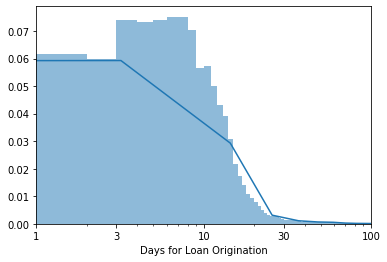

In [27]:
bin_edges = np.arange(0, df['days_for_loan_origination'].max()+1, 1)
sb.distplot(df['days_for_loan_origination'], bins = bin_edges,
            hist_kws = {'alpha' : 0.5})
#sb.distplot(df['days_for_loan_origination']);
plt.xscale('log');
plt.xlim(1,100);
x_ticks = [1, 3, 10, 30, 100]
plt.xticks(x_ticks, x_ticks);
plt.xlabel('Days for Loan Origination');
#plt.ylabel('distribution');

In [179]:
#df.groupby(pd.to_datetime(df['ListingCreationDate'], format='%Y-%m-%d').dt.year)['ListingNumber'].count()
listings_by_year = df.groupby(df['ListingCreationDate'].dt.year)['ListingNumber'].count()

In [180]:
listings_by_year

ListingCreationDate
2006     3076
2007     9225
2008    11240
2009     2206
2010     5530
2011    11442
2012    19556
2013    34791
2014    10485
Name: ListingNumber, dtype: int64

In [181]:
total = df['ListingCreationDate'].count()

In [182]:
listings_by_year.iloc[1]

9225

In [183]:
texts = ['{:0.2f}%'.format(100*listings_by_year.iloc[i]/total) for i in range(listings_by_year.shape[0])]

In [184]:
for text in texts:
    print(text)

2.86%
8.58%
10.45%
2.05%
5.14%
10.64%
18.18%
32.35%
9.75%


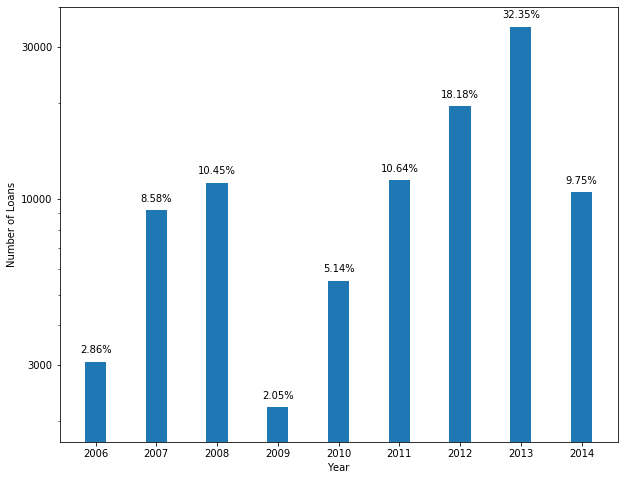

In [185]:
width = 0.35
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
plt.yscale('log');
x_ticks = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
plt.xticks(x_ticks, x_ticks);
y_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.yticks(y_ticks, y_ticks);
plt.xlabel('Year');
plt.ylabel('Number of Loans');
rects = ax.bar(listings_by_year.index, listings_by_year.values, width);
texts = ['{:0.2f}%'.format(100*listings_by_year.iloc[i]/total) for i in range(listings_by_year.shape[0])]

for rect, text in zip(rects, texts):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, text, ha='center', va='bottom');

plt.show()

In [48]:
listingcategory = pd.Series(['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans'])

In [51]:
listingcategory_val = df.groupby(df['ListingCategory (numeric)'])['ListingNumber'].count()

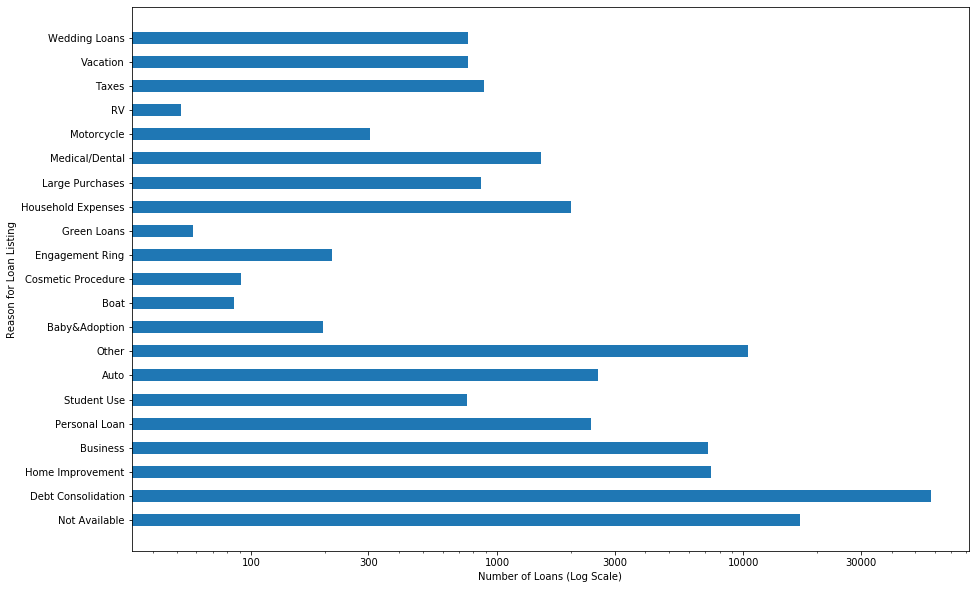

In [85]:
width = 0.5
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
plt.xscale('log');
x_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.xticks(x_ticks, x_ticks);
plt.ylabel('Reason for Loan Listing');
plt.xlabel('Number of Loans (Log Scale)');
rects = ax.barh(listingcategory.values, listingcategory_val.values, width);
plt.show()

In [89]:
# Check if borrower is a home owner
df.IsBorrowerHomeowner.value_counts()

True     57052
False    56014
Name: IsBorrowerHomeowner, dtype: int64

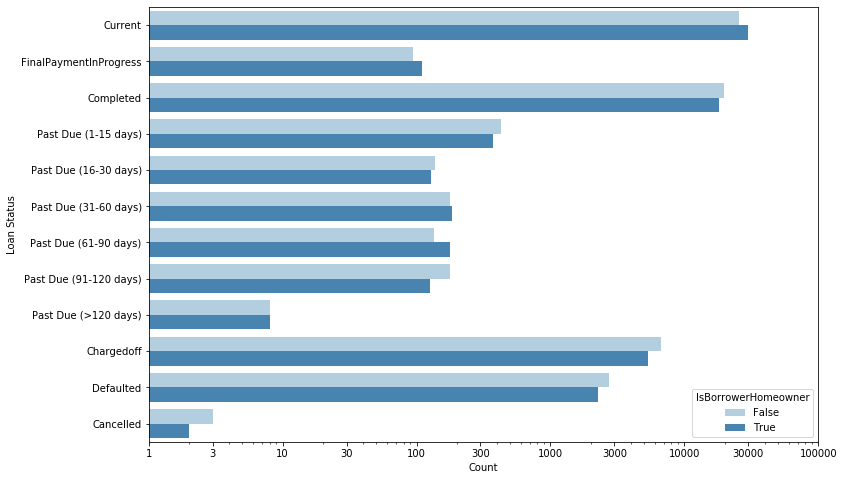

In [106]:
# Since the data is almost evenly split between homeowners and non-homeowners, let's see the Loan Status for each of them.
plt.figure(figsize=[12, 8]);
ax = sb.countplot(data = df, y = 'LoanStatus', hue='IsBorrowerHomeowner', palette = 'Blues');
plt.xscale('log');
x_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
plt.xticks(x_ticks, x_ticks);
plt.xlabel('Count');
plt.ylabel('Loan Status');

#### There doesn't seem to be any appreciable difference in the loan status of Home owners vs Non-Home owners.

In [189]:
# Check if Income Verifiable
df.IncomeVerifiable.value_counts()

True     99095
False     8456
Name: IncomeVerifiable, dtype: int64

In [201]:
df[df['LoanStatus'].isin(['Current', 'FinalPaymentInProgress', 'Completed'])]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
34869,91303592830657779899A4D,1000010,2013-11-07 08:48:36.417,NaN,60,Current,NaT,0.20347,0.1795,0.1695,0.15767,0.0774,0.08027,4.0,C,5.0,1,CA,Analyst,Employed,299.0,True,False,NaN,2013-12-02 12:59:47.000,700.0,719.0,1996-10-24 00:00:00,11.0,10.0,27.0,9,272.0,1.0,3.0,1.0,15875.0,2.0,0.0,0.0,12381.0,0.42,16448.0,24.0,0.87,3.0,0.06,"$100,000+",True,9583.333333,ECBF37002223098965D5BCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,120811,13000,2013-12-09,Q4 2013,A636369868383587796DADB,329.76,653.1268,265.15,387.9768,-21.97,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
73298,FF7235942988350144D0D23,1000015,2013-11-16 14:12:28.577,NaN,36,FinalPaymentInProgress,NaT,0.33215,0.2925,0.2825,0.25691,0.1475,0.10941,2.0,E,2.0,7,UT,Other,Employed,61.0,True,False,NaN,2013-11-16 14:12:28.000,640.0,659.0,1991-03-02 00:00:00,8.0,7.0,35.0,6,189.0,2.0,6.0,2.0,0.0,4.0,1.0,0.0,5137.0,0.94,312.0,25.0,0.88,0.0,0.04,"$75,000-99,999",True,6500.000000,68DB36985465597713176A6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,110814,2000,2013-11-19,Q4 2013,068E3699181338417532178,84.08,252.2400,107.46,144.7800,-4.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,3
12152,A17035940185740923A0005,1000018,2013-11-16 14:14:59.250,NaN,36,Current,NaT,0.17969,0.1435,0.1335,0.12640,0.0524,0.07400,5.0,B,7.0,1,MN,Professional,Employed,98.0,True,False,NaN,2013-11-16 14:15:02.000,720.0,739.0,1990-07-21 00:00:00,11.0,11.0,40.0,6,388.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,18219.0,0.37,30107.0,32.0,1.00,0.0,0.35,"$50,000-74,999",True,5000.000000,E4C9369851108853170C2D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,119210,3000,2013-12-02,Q4 2013,ED1F3697888837106776FC2,103.04,309.1200,205.26,103.8600,-7.24,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
43473,C45A3595706307490409D94,1000045,2013-11-16 15:00:15.290,NaN,36,Current,NaT,0.19859,0.1620,0.1520,0.14311,0.0599,0.08321,5.0,B,5.0,1,WI,Clerical,Employed,13.0,False,False,NaN,2013-11-16 15:00:17.000,680.0,699.0,1999-08-13 00:00:00,12.0,12.0,21.0,5,380.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,19079.0,0.61,11966.0,21.0,0.95,1.0,0.29,"$25,000-49,999",True,2833.333333,95DA36996318949059945B9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,111111,10000,2013-11-20,Q4 2013,144D3698846585026778E67,352.56,1053.2416,658.39,394.8516,-24.65,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
89220,41363381520351779915A4C,100005,2007-02-15 11:26:46.260,C,36,Completed,2009-09-01,0.06174,0.0550,0.0450,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Full-time,14.0,False,True,BFDA337705825388653614A

In [258]:
df['loan_status_cond'] = 'In Trouble'
df.loc[(df['LoanStatus'].isin(['Current', 'FinalPaymentInProgress', 'Completed'])), 'loan_status_cond'] = 'In Good Standing'
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,loan_status_cond
34869,91303592830657779899A4D,1000010,2013-11-07 08:48:36.417,NaN,60,Current,NaT,0.20347,0.1795,0.1695,0.15767,0.0774,0.08027,4.0,C,5.0,1,CA,Analyst,Employed,299.0,True,False,NaN,2013-12-02 12:59:47.000,700.0,719.0,1996-10-24 00:00:00,11.0,10.0,27.0,9,272.0,1.0,3.0,1.0,15875.0,2.0,0.0,0.0,12381.0,0.42,16448.0,24.0,0.87,3.0,0.06,"$100,000+",True,9583.333333,ECBF37002223098965D5BCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,120811,13000,2013-12-09,Q4 2013,A636369868383587796DADB,329.76,653.1268,265.15,387.9768,-21.97,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,In Good Standing
73298,FF7235942988350144D0D23,1000015,2013-11-16 14:12:28.577,NaN,36,FinalPaymentInProgress,NaT,0.33215,0.2925,0.2825,0.25691,0.1475,0.10941,2.0,E,2.0,7,UT,Other,Employed,61.0,True,False,NaN,2013-11-16 14:12:28.000,640.0,659.0,1991-03-02 00:00:00,8.0,7.0,35.0,6,189.0,2.0,6.0,2.0,0.0,4.0,1.0,0.0,5137.0,0.94,312.0,25.0,0.88,0.0,0.04,"$75,000-99,999",True,6500.000000,68DB36985465597713176A6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,110814,2000,2013-11-19,Q4 2013,068E3699181338417532178,84.08,252.2400,107.46,144.7800,-4.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,3,In Good Standing
12152,A17035940185740923A0005,1000018,2013-11-16 14:14:59.250,NaN,36,Current,NaT,0.17969,0.1435,0.1335,0.12640,0.0524,0.07400,5.0,B,7.0,1,MN,Professional,Employed,98.0,True,False,NaN,2013-11-16 14:15:02.000,720.0,739.0,1990-07-21 00:00:00,11.0,11.0,40.0,6,388.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,18219.0,0.37,30107.0,32.0,1.00,0.0,0.35,"$50,000-74,999",True,5000.000000,E4C9369851108853170C2D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,119210,3000,2013-12-02,Q4 2013,ED1F3697888837106776FC2,103.04,309.1200,205.26,103.8600,-7.24,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,In Good Standing
43473,C45A3595706307490409D94,1000045,2013-11-16 15:00:15.290,NaN,36,Current,NaT,0.19859,0.1620,0.1520,0.14311,0.0599,0.08321,5.0,B,5.0,1,WI,Clerical,Employed,13.0,False,False,NaN,2013-11-16 15:00:17.000,680.0,699.0,1999-08-13 00:00:00,12.0,12.0,21.0,5,380.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,19079.0,0.61,11966.0,21.0,0.95,1.0,0.29,"$25,000-49,999",True,2833.333333,95DA36996318949059945B9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,111111,10000,2013-11-20,Q4 2013,144D3698846585026778E67,352.56,1053.2416,658.39,394.8516,-24.65,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,In Good Standing
89220,41363381520351779915A4C,100005,2007-02-15 11:26:46.260,C,36,Completed,2009-09-01,0.06174,0.0550,0.0450

In [259]:
ver_inc_true_total = df[df['IncomeVerifiable'] == True]['loan_status_cond'].count()
ver_inc_false_total = df[df['IncomeVerifiable'] == False]['loan_status_cond'].count()

In [260]:
# Plotting the proportion of loans for various Loan Statuses based on the Income Verifiable flag.
s1 = pd.Series(df[df['IncomeVerifiable'] == True]['loan_status_cond'].value_counts()/ver_inc_true_total, name='s1')
s2 = pd.Series(df[df['IncomeVerifiable'] == False]['loan_status_cond'].value_counts()/ver_inc_false_total, name='s2')
#d1 = pd.DataFrame({'loan_status_cond': s1.index, 'proportion': s1.values, 'IncomeVerifiable': 'True'})
#d2 = pd.DataFrame({'loan_status_cond': s2.index, 'proportion': s2.values, 'IncomeVerifiable': 'False'})
#df_loan_sts = d1.append(d2, ignore_index=True)
#df_loan_sts.head()

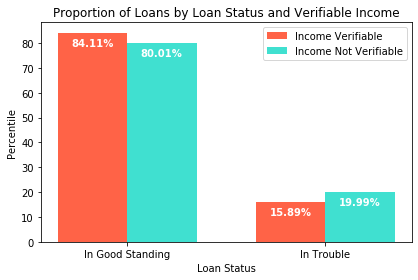

In [271]:
x = np.arange(len(s1.index))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots();
rects1 = ax.bar(x - width/2, s1.values*100, width, label='Income Verifiable', color='tomato');
rects2 = ax.bar(x + width/2, s2.values*100, width, label='Income Not Verifiable', color='turquoise');

ax.set_ylabel('Percentile')
ax.set_title('Proportion of Loans by Loan Status and Verifiable Income')
ax.set_xticks(x)
ax.set_xticklabels(s1.index)
ax.set_xlabel('Loan Status')
ax.legend();

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.2f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -15),  # 3 points vertical offset
                    textcoords="offset points", color='white', fontweight='bold',
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()